# Video Game Sales
## Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as smf
from statsmodels.tsa.ar_model import AutoReg

### Data Cleaning

In [2]:
data = pd.read_csv("vgsales.csv")

In [3]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
data.dropna()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Looking at the data a little later on will show that the observations per year become sparse outside of the range [1993, 2016] in this dataset, so we should get rid of those to get consistent yearly aggregates.

In [5]:
data = data[(data.Year>1992) & (data.Year<2017)]
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01


### Exploration (Platform)

Let's first take a look at the maximum global game sales by platform ranked from highest to lowest. It's clear that Nintendo is the dominant player (no pun intended) in platform game sales worldwide with *Wii Sports (Wii), Pokemon Red/Blue (GB), and New Super Mario Bros. (DS).* This dominance is most likely due to the varied nature of the platforms and their strong title exclusivity.

In [6]:
data_top = data.copy()
data_top['Year'] = data_top['Year'].astype(int)
data_top.sort_values('Global_Sales', ascending=False).groupby('Platform').head(1)[['Year','Platform','Name','Global_Sales']]

,Year,Platform,Name,Global_Sales
0,2006,Wii,Wii Sports,82.74
4,1996,GB,Pokemon Red/Pokemon Blue,31.37
6,2006,DS,New Super Mario Bros.,30.01
15,2010,X360,Kinect Adventures!,21.82
16,2013,PS3,Grand Theft Auto V,21.40
17,2004,PS2,Grand Theft Auto: San Andreas,20.81
25,2002,GBA,Pokemon Ruby/Pokemon Sapphire,15.85
32,2013,3DS,Pokemon X/Pokemon Y,14.35
33,2015,PS4,Call of Duty: Black Ops 3,14.24
46,1996,N64,Super Mario 64,11.89


In [7]:
data.groupby("Platform")["Global_Sales"].max().sort_values(ascending=False)

Platform
Wii     82.74
GB      31.37
DS      30.01
X360    21.82
PS3     21.40
PS2     20.81
GBA     15.85
3DS     14.35
PS4     14.24
N64     11.89
PS      10.95
SNES    10.55
XB       8.49
PC       8.11
PSP      7.72
XOne     7.30
GC       7.07
WiiU     6.96
DC       2.42
PSV      2.25
SAT      1.93
GEN      1.82
NES      1.75
SCD      1.50
WS       0.51
NG       0.25
TG16     0.14
3DO      0.06
PCFX     0.03
Name: Global_Sales, dtype: float64

Now we'll make a new DF with the above information aggregated by sum this time so that we can explore platform success more generally, not analysing specific titles individually.

In [8]:
agg_data_plat_tot = data.groupby(by="Platform")["Global_Sales"].agg("sum")
agg_data_plat_tot

Platform
3DO        0.10
3DS      246.28
DC        15.97
DS       818.65
GB       152.07
GBA      313.56
GC       197.14
GEN        8.76
N64      218.21
NES        3.72
NG         1.44
PC       251.97
PCFX       0.03
PS       727.39
PS2     1233.46
PS3      949.35
PS4      278.07
PSP      291.71
PSV       61.61
SAT       33.59
SCD        1.87
SNES     124.70
TG16       0.16
WS         1.42
Wii      909.81
WiiU      81.86
X360     969.61
XB       252.09
XOne     141.06
Name: Global_Sales, dtype: float64

We now visualise the data and see who came out on top.

<Axes: title={'center': 'Platform Total Game Sales (1993-2016)'}, xlabel='Platform', ylabel='Millions of Games Sold'>

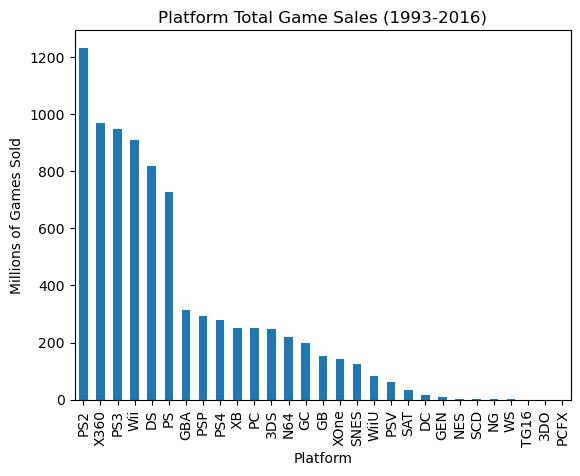

In [9]:
agg_data_plat_tot.sort_values(ascending=False).plot.bar(title="Platform Total Game Sales (1993-2016)", 
                                                        ylabel="Millions of Games Sold")

Amazingly, the PS2 outperformed all other platforms by over 200 million games sold! However, this chart is making me nervous for the veracity of the dataset. It seems dubious to me that PC games are listed on par with the XBox. My best estimate, without finding or being given any further information about the dataset, is that these "PC games" are PC exclusives only. For games like *Halo: CE*, this drastically underestimates the size of the PC game market.

### Market Share (Platform)

In [10]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01


Now what we want is a DF that has years attached, so that we can track market share over time.

In [11]:
df_plat = data[["Year", "Platform", "Global_Sales"]].copy()
df_plat.head()

,Year,Platform,Global_Sales
0,2006.0,Wii,82.74
2,2008.0,Wii,35.82
3,2009.0,Wii,33.00
4,1996.0,GB,31.37
6,2006.0,DS,30.01


In [12]:
df_plat["Year"] = df_plat["Year"].astype(int)
df_plat_yr = df_plat.copy()

I could have made the year a datetime value, but the stacked bar chart plays nicer with integers. I also make a copy of this DF so I can run an ANOVA including year later.

In [13]:
df_plat.set_index(["Year"], inplace = True)
df_plat.head()

,Platform,Global_Sales
Year,,
2006,Wii,82.74
2008,Wii,35.82
2009,Wii,33.00
1996,GB,31.37
2006,DS,30.01


In [14]:
platform_sales = df_plat.groupby("Platform")["Global_Sales"].agg("sum")
top_10_platforms = platform_sales.sort_values(ascending=False).head(10).index
top_platforms_df = df_plat[df_plat["Platform"].isin(top_10_platforms)].sort_index()

pivot_df = top_platforms_df.pivot_table(index='Year', columns='Platform', values='Global_Sales', aggfunc='sum')

Let me break down what just happened. First I did your standard `groupby` with sum aggregation which gave us a multi-indexed DF of `Global_Sales`. I then isolated the top ten platforms by sorting in descending order and taking the ten innermost indices (platforms). After isolating the top ten platforms, I used them as a mask to isolate sales only from top ten platforms and sorted them by year. Finally, I made a pivot table from the previous DF, since the transposition of data plays nicer with the `.plot()` method.

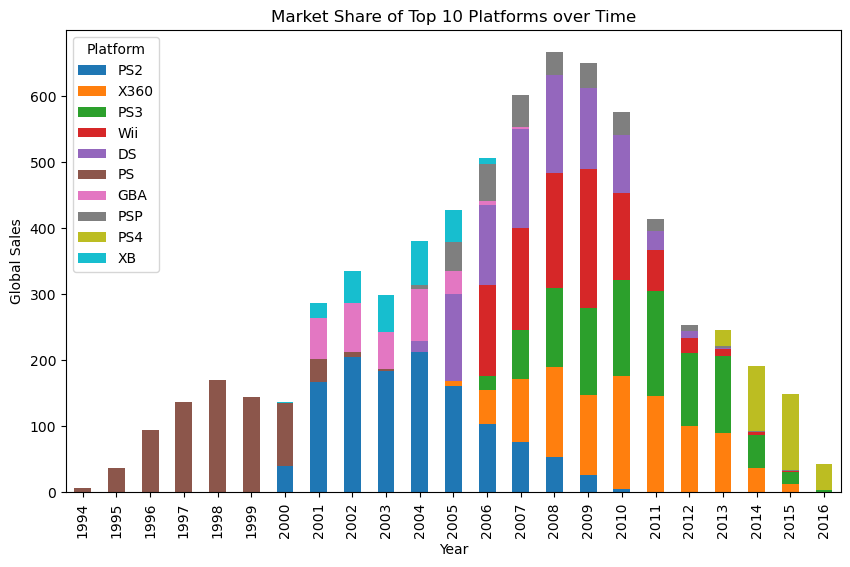

In [15]:
pivot_df[top_10_platforms].plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel("Year")
plt.ylabel("Global Sales")
plt.title("Market Share of Top 10 Platforms over Time")
plt.legend(title="Platform", loc='upper left')

plt.show()

Most gamers will recognise the handoff between console generations here, but let me be explicit about it. Generations typically occur every six years and are typified by the release of one or more seminal game consoles. The PlayStation released just in time for Christmas in 1994, so we see the stacks change beginning to change in 2000, 2006, and 2012. 

The first generation shown is simply the PlayStation with little to no competition. In 2000, the PS2, Gameboy Advance, and XBox take the reigns, but the clear winner in sales is the PS2. In 2006 the Wii does not hesitate in taking over the market alongside the Nintendo DS a year prior. Only halfway through this generation, the XBox 360 and PS3 become dominant. Finally, the PS4 takes over after 2012 at the usual rate we see from other consoles (Wii notwithstanding).

PlayStation seems to be the most consistently successful platform over its generations with XBox having the same stability but not the same success. Nintendo, on the other hand, seems to pack enormous punch with each of its platforms, while also overlapping the success of multiple platforms at once.

In [16]:
f = "Global_Sales ~ Platform + Year + Platform*Year"
mod = smf.ols(formula=f, data=df_plat_yr)
res = mod.fit()
print(anova_lm(res))

                    df        sum_sq     mean_sq           F        PR(>F)
Platform          28.0    792.590301   28.306796   13.377006  1.814959e-61
Year               1.0    214.468094  214.468094  101.351662  9.068840e-24
Platform:Year     28.0    778.270367   27.795370   13.135320  3.934986e-60
Residual       15962.0  33776.848220    2.116079         NaN           NaN


And just to confirm that the platform and time are both relevant factors to game sales, I ran an ANOVA with interaction to show that they are both separately impactful in game sales, and that there is a time trend to consider later on when I perform an autoregression on the data.

### Exploration (Publisher)

The following process is nearly identical to the previous analysis by platform, so markdown will be limited to the end, when analysis is warranted.

In [17]:
agg_pub_sort = data.groupby("Publisher")["Global_Sales"].agg("sum").sort_values(ascending=False).head(10)
agg_pub_sort

Publisher
Nintendo                        1459.94
Electronic Arts                 1093.33
Activision                       703.00
Sony Computer Entertainment      607.28
Ubisoft                          473.25
Take-Two Interactive             399.30
THQ                              340.44
Konami Digital Entertainment     266.74
Sega                             255.34
Microsoft Game Studios           245.79
Name: Global_Sales, dtype: float64

<Axes: ylabel='Publisher'>

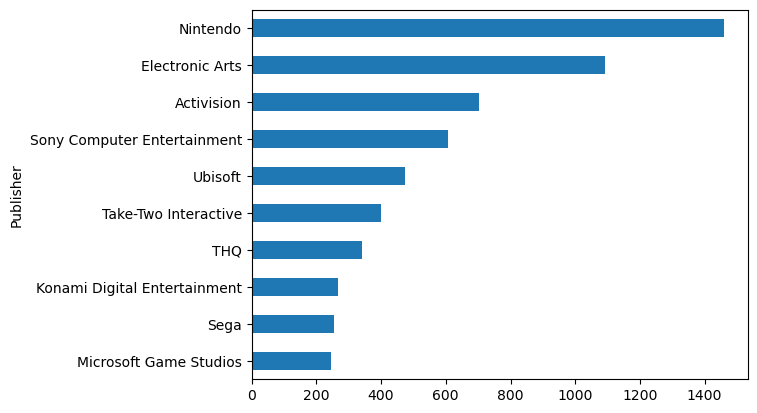

In [18]:
agg_pub_sort.sort_values().plot.barh()

### Market Share (Publisher)

In [19]:
df_pub = data[["Year", "Publisher", "Global_Sales"]].copy()
df_pub.head()

,Year,Publisher,Global_Sales
0,2006.0,Nintendo,82.74
2,2008.0,Nintendo,35.82
3,2009.0,Nintendo,33.00
4,1996.0,Nintendo,31.37
6,2006.0,Nintendo,30.01


In [20]:
df_pub["Year"] = df_pub["Year"].astype(int)

In [21]:
df_pub.set_index(["Year"], inplace = True)
df_pub.head()

,Publisher,Global_Sales
Year,,
2006,Nintendo,82.74
2008,Nintendo,35.82
2009,Nintendo,33.00
1996,Nintendo,31.37
2006,Nintendo,30.01


In [22]:
top_10_pubs = agg_pub_sort.index
top_pubs_df = df_pub[df_pub["Publisher"].isin(top_10_pubs)].sort_index()

pub_pivot_df = top_pubs_df.pivot_table(index='Year', columns='Publisher', values='Global_Sales', aggfunc='sum')

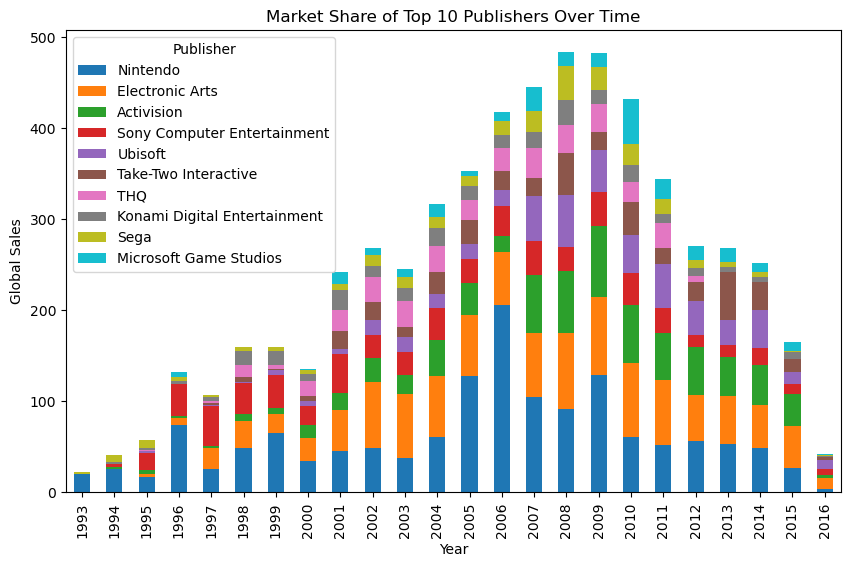

In [23]:
pub_pivot_df[top_10_pubs].plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel("Year")
plt.ylabel("Global Sales")
plt.title("Market Share of Top 10 Publishers Over Time")
plt.legend(title="Publisher", loc='upper left')

plt.show()

Let's track the top 3 publishers in this chart: Nintendo, EA, and Activision. Nintendo, having had an absolute chokehold on the games released on their platforms until the release of the Switch (2017), keeps a very deep connection between its platform and its games. This connection is clear when we look at 2005 and 2006 with massive spikes in game sales due to the release of the DS, the Wii, and the games that Nintendo published for them. Another spike for Nintendo can be seen in 2009 with the release of *Wii Sports, Wii Sports Resort*, and *Wii Fit (Plus)*. With the aforementioned release of the Switch, many insights about its success (especially during the Covid-19 lockdown) beg further analysis of more recent data.

EA has a famously (infamously?) regular release schedule, which is reflected in their steady dominance in market share as a publisher. Their most well-known division, EA Sports, has released yearly entries in highly successful franchises like *Madden NFL* and *FIFA* (until 2022), which has produced consistent sales and profits for the company. EA has come under fire in recent years for its "cash-grab" licensed franchises, not to mention its insistence on loot box mechanics and micro transactions. It would be worth analysing more recent data on EA's success, given its widespread criticism.

Activision is also know for consistent releases, especially in the *Call of Duty (CoD)* franchise of games. The publisher's first main spike occurs in 2007/8, corresponding to the releas of *CoD 4: Modern Warfare* and *CoD 5: World at War*, two of the most successful games in the FPS genre to date at the time. In 2009, Activision's success was furthered by *CoD: Modern Warfare 2*, which revolutionised the multiplayer experience for FPS games, even beyond the effect of the first *Modern Warfare*. Now on par with EA's yearly release schedule, and with a penchant for re-releasing its most successful games, it would be prudent -- alongside EA -- to re-analyse its success past 2016.

## Autoregression Model

The questions I want to answer with the autoregression are: "is the games industry growing regardless of a simple trend" and "are console generations more relevant than the widely-adopted yearly release schedule?"

To begin, I will just load the year and sales data for a pure AR model.

In [24]:
df_ts = data[["Year", "Global_Sales"]].copy()
df_ts.head()

,Year,Global_Sales
0,2006.0,82.74
2,2008.0,35.82
3,2009.0,33.00
4,1996.0,31.37
6,2006.0,30.01


In [25]:
df_ts["Year"] = df_ts["Year"].astype(int)

In [26]:
df_ts.head()

,Year,Global_Sales
0,2006,82.74
2,2008,35.82
3,2009,33.00
4,1996,31.37
6,2006,30.01


In [27]:
df_ts_yr = df_ts.groupby("Year").agg("sum")

In [28]:
df_ts_yr.head()

,Global_Sales
Year,
1993,45.98
1994,79.17
1995,88.11
1996,199.15
1997,200.98


To play nicely with the `statsmodels.tsa.ar_model.AutoReg()` method, I will convert the years into datetime format with a defined frequency.

In [29]:
df_ts_yr.index = pd.to_datetime(df_ts_yr.index, format="%Y")
df_ts_yr.index = pd.DatetimeIndex(df_ts_yr.index.values, freq="AS")
df_ts_yr.head()

,Global_Sales
1993-01-01,45.98
1994-01-01,79.17
1995-01-01,88.11
1996-01-01,199.15
1997-01-01,200.98


Now I run an AR(1) model on the data with constant and trend to answer whether the games industry is growing beyond the rate that a linear trend would suggest.

In [30]:
mod1 = AutoReg(df_ts_yr, 1, trend="ct")
res1 = mod1.fit()
print(res1.summary())

                            AutoReg Model Results                             
Dep. Variable:           Global_Sales   No. Observations:                   24
Model:                     AutoReg(1)   Log Likelihood                -127.781
Method:               Conditional MLE   S.D. of innovations             62.600
Date:                Fri, 19 Jan 2024   AIC                            263.562
Time:                        17:21:53   BIC                            268.104
Sample:                    01-01-1994   HQIC                           264.705
                         - 01-01-2016                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              75.9206     31.100      2.441      0.015      14.965     136.876
trend              -8.8020      2.639     -3.335      0.001     -13.975      -3.629
Global_Sales.L1     1.1108      

Our question is answered: the industry is growing all right!

Now I want to see if the shift in console generation is relevant at all to game sales, so I run an AR(6) model to check this assumption.

In [31]:
mod6 = AutoReg(df_ts_yr, 6, trend="ct")
res6 = mod6.fit()
print(res6.summary())

                            AutoReg Model Results                             
Dep. Variable:           Global_Sales   No. Observations:                   24
Model:                     AutoReg(6)   Log Likelihood                 -98.885
Method:               Conditional MLE   S.D. of innovations             58.830
Date:                Fri, 19 Jan 2024   AIC                            215.769
Time:                        17:21:53   BIC                            223.783
Sample:                    01-01-1999   HQIC                           216.874
                         - 01-01-2016                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             163.6744     90.832      1.802      0.072     -14.353     341.702
trend             -22.9880     14.070     -1.634      0.102     -50.565       4.589
Global_Sales.L1     1.4338      

The answer is a resounding no. The only thing that matters to game sales over time is the next entry in a franchise or the release of a new IP, console generations have nothing to do with it.

## Exploration of Top Franchises

In this section I will take a look at the most popular/well-known franchises (in my experience) from the top 3 publishers that we looked at (Nintendo, EA, and Activision). I will examine them in reverse order of publisher market share.

### Call of Duty (Activision)

First, I'll look at the *Call of Duty* franchise, since the highest spikes in Activision's market share occurred around times that a new entry in the CoD series of games. I will need to create a dataset of all the games containing "Call of Duty" in their name.

In [32]:
cod_games = data[data['Name'].str.contains("Call of Duty")].copy()
cod_games['Year'] = cod_games['Year'].astype(int)
cod_games = cod_games.set_index('Year')
cod_games.head(10)

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,,
2011,30,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
2010,32,Call of Duty: Black Ops,X360,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
2015,34,Call of Duty: Black Ops 3,PS4,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
2012,35,Call of Duty: Black Ops II,PS3,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
2012,36,Call of Duty: Black Ops II,X360,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
2009,37,Call of Duty: Modern Warfare 2,X360,Shooter,Activision,8.52,3.63,0.08,1.29,13.51
2011,38,Call of Duty: Modern Warfare 3,PS3,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
2010,41,Call of Duty: Black Ops,PS3,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
2009,56,Call of Duty: Modern Warfare 2,PS3,Shooter,Activision,4.99,3.69,0.38,1.63,10.69


Now I want to see which platform the *Call of Duty* franchise has been most successful on. As we'll see, our memories of CoD XBox Live lobbies are not to be mistrusted.

<Axes: xlabel='Platform', ylabel='Millions of Copies Sold'>

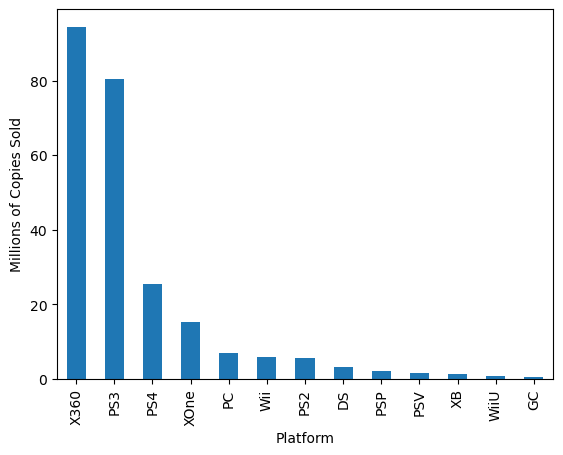

In [33]:
cod_games.groupby('Platform')['Global_Sales'].agg('sum').sort_values(ascending=False).plot.bar(ylabel='Millions of Copies Sold')

<Axes: xlabel='Millions of Copies Sold', ylabel='Entry in Franchise'>

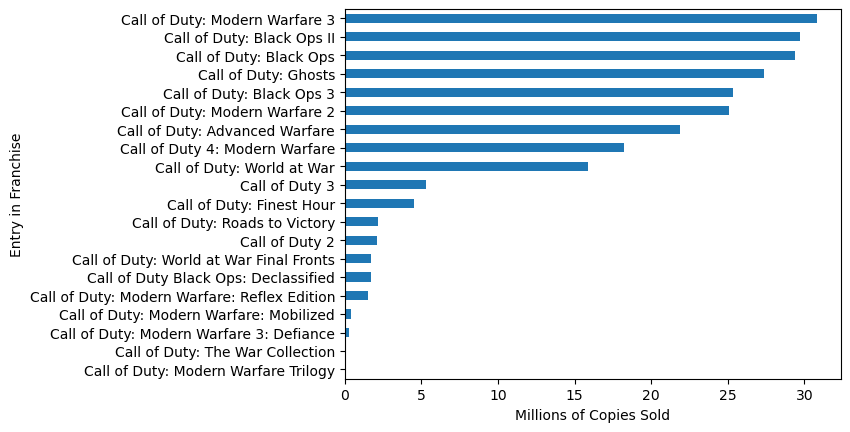

In [34]:
cod_games.groupby('Name')['Global_Sales'].agg('sum').sort_values().plot.barh(xlabel='Millions of Copies Sold', ylabel='Entry in Franchise')

The meat and potatoes of this analysis is really which entry in each franchise was most successful. I am shocked to see MW3 as the winner and BO2 as the runner-up in the above chart, but I suppose it makes sense. Common consensus from anecdotal sources suggests that MW2 and BO1 were generally better games. Nevertheless, it occurred to me that -- given the acclaim of these games -- it isn't unexpected that fans bought their direct sequels in droves.

<Axes: xlabel='Millions of Copies Sold', ylabel='Entry in Franchise'>

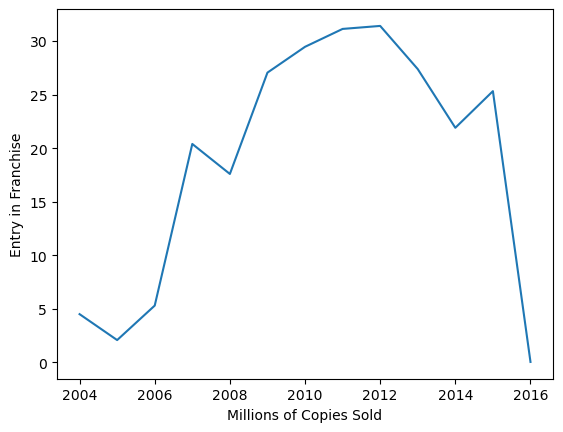

In [35]:
cod_games.groupby('Year')['Global_Sales'].agg('sum').sort_index().plot.line(xlabel='Millions of Copies Sold', ylabel='Entry in Franchise')

Finally, the success of the franchise can be seen peaking around 2012, which is also roughly the last time I bought a *Call of Duty* game. Although this checks out for me, I would be interested to see how recent re-releases and newer entries in the series have fared.

### FIFA (EA)

Next on the block is the *FIFA* franchise, known for its boring consistency. In fact, I don't analyse by title because for each year, $y$,  *FIFA* $(y+1)$ is released.

In [36]:
fifa_games = data[data['Name'].str.contains("FIFA")].copy()
fifa_games['Year'] = fifa_games['Year'].astype(int)
fifa_games = fifa_games.set_index('Year')
fifa_games.head(10)

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,,
2015,78,FIFA 16,PS4,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
2012,83,FIFA Soccer 13,PS3,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
2013,113,FIFA 14,PS3,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90
2011,122,FIFA 12,PS3,Sports,Electronic Arts,0.84,4.32,0.11,1.42,6.69
2014,125,FIFA 15,PS4,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.59
2012,186,FIFA Soccer 13,X360,Action,Electronic Arts,1.08,3.48,0.03,0.58,5.18
2010,200,FIFA Soccer 11,PS3,Sports,Electronic Arts,0.60,3.29,0.06,1.13,5.08
2014,220,FIFA 15,PS3,Sports,Electronic Arts,0.57,3.14,0.04,1.07,4.82
2016,222,FIFA 17,PS4,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77


<Axes: xlabel='Platform', ylabel='Millions of Copies Sold'>

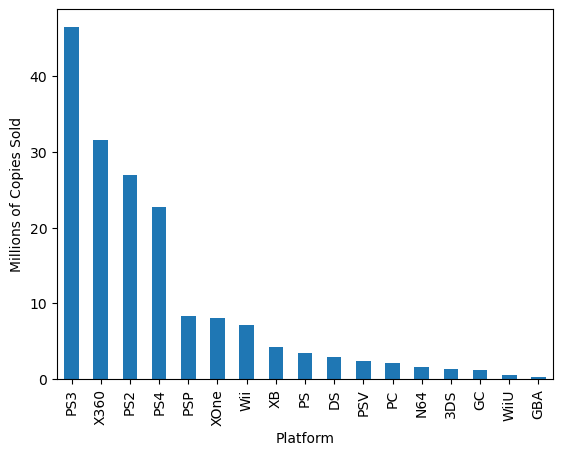

In [37]:
fifa_games.groupby('Platform')['Global_Sales'].agg('sum').sort_values(ascending=False).plot.bar(ylabel='Millions of Copies Sold')

Now we know that *FIFA* players are most likely PS3 owners, which seems accurate given that countries in western Europe (namely France, Germany, and Spain, regions wholly obsessed with football and which have readily accessible data for console sales) [favour the PS3 over the XBox 360](https://en.wikipedia.org/wiki/List_of_best-selling_game_consoles_by_region#Western_Europe).

<Axes: xlabel='Millions of Copies Sold', ylabel='Entry in Franchise'>

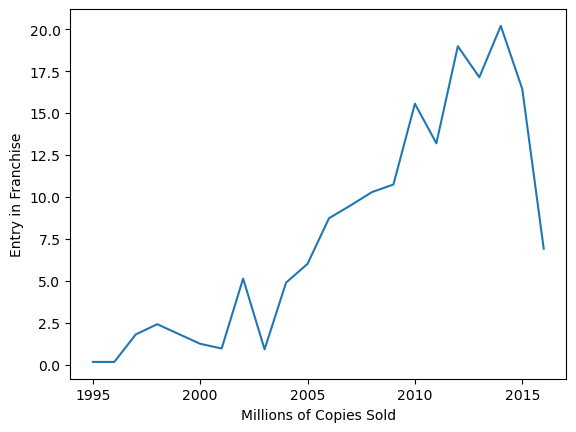

In [38]:
fifa_games.groupby('Year')['Global_Sales'].agg('sum').sort_index().plot.line(xlabel='Millions of Copies Sold', ylabel='Entry in Franchise')

It may be hard to see, but there are sales spikes roughly every 4 years starting in 1998. This is indicative of the effect that the World Cup has on sales of football games. Below I show you that there are multiple games release leading up to and in the year of the World Cup.

In [39]:
fifa_games.groupby([fifa_games.index, 'Name'])['Global_Sales'].agg('sum')

Year  Name                              
1995  FIFA Soccer 96                         0.16
1996  FIFA Soccer 97                         0.16
1997  FIFA Soccer 64                         0.49
      FIFA: Road to  World Cup 98            0.58
      FIFA: Road to World Cup 98             0.73
1998  FIFA 2000                              1.87
      FIFA 99                                0.54
2000  FIFA 2001 Major League Soccer          0.32
      FIFA 2001: Major League Soccer         0.09
      FIFA Soccer World Championship         0.83
2001  FIFA Soccer 2002                       0.96
2002  2002 FIFA World Cup                    0.83
      FIFA Soccer 2003                       4.16
      FIFA Soccer 2003 (weekly jp sales)     0.04
      Project FIFA World Cup                 0.10
2003  FIFA Soccer 2004                       0.91
2004  FIFA Soccer 2005                       4.89
2005  FIFA 06 Soccer                         0.14
      FIFA 06: Road to FIFA World Cup        0.15
      FIF

### Mario (Nintendo)

Finally, I take a look at Mario games, i.e. any game with "Mario" in the title. Nintendo is known for its high volume of platforms, with the Mario franchise having releases on all of their platforms/consoles to my knowledge. The overarching nature of the franchise and its global recognition is why I chose it for this analysis.

In [40]:
mario_games = data[data['Name'].str.contains("Mario")].copy()
mario_games['Year'] = mario_games['Year'].astype(int)
mario_games = mario_games.set_index('Year')

mario_games.head(10)

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,,
2008,3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2006,7,New Super Mario Bros.,DS,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
2009,9,New Super Mario Bros. Wii,Wii,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
2005,12,Mario Kart DS,DS,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
2011,43,Mario Kart 7,3DS,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21
1996,47,Super Mario 64,N64,Platform,Nintendo,6.91,2.85,1.91,0.23,11.89
2007,49,Super Mario Galaxy,Wii,Platform,Nintendo,6.16,3.40,1.20,0.76,11.52
2011,54,Super Mario 3D Land,3DS,Platform,Nintendo,4.89,2.99,2.13,0.78,10.79
1993,58,Super Mario All-Stars,SNES,Platform,Nintendo,5.99,2.15,2.12,0.29,10.55


<Axes: xlabel='Platform', ylabel='Millions of Copies Sold'>

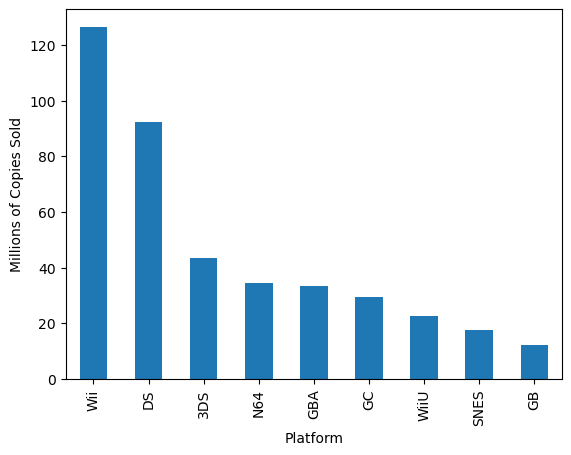

In [41]:
mario_games.groupby('Platform')['Global_Sales'].agg('sum').sort_values(ascending=False).plot.bar(ylabel='Millions of Copies Sold')

No surprises here; the Wii is the platform with the best-selling (and second and third best-selling) game in the period analysed. Naturally, the wii also sells the most successful Mario games. The below chart confirms this as well, with 2 out of the 3 top Mario games being released for the Wii.

<Axes: xlabel='Millions of Copies Sold', ylabel='Entry in Franchise'>

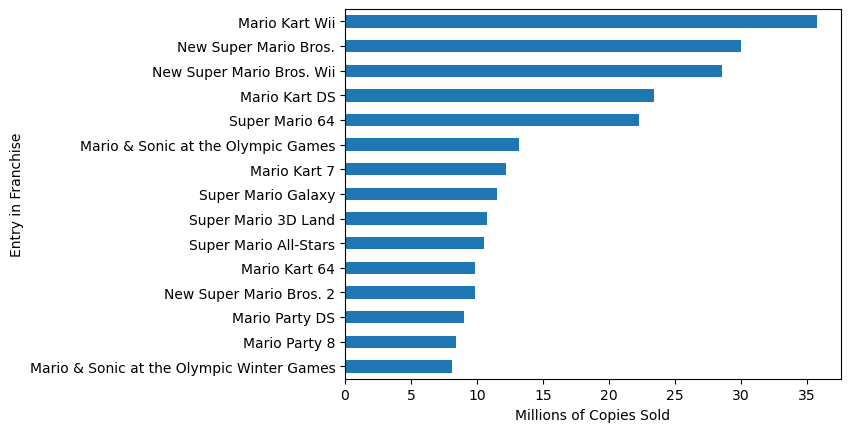

In [42]:
mario_games.groupby('Name')['Global_Sales'].agg('sum').sort_values(ascending=False).head(15).sort_values().plot.barh(xlabel='Millions of Copies Sold', ylabel='Entry in Franchise')

<Axes: xlabel='Millions of Copies Sold', ylabel='Entry in Franchise'>

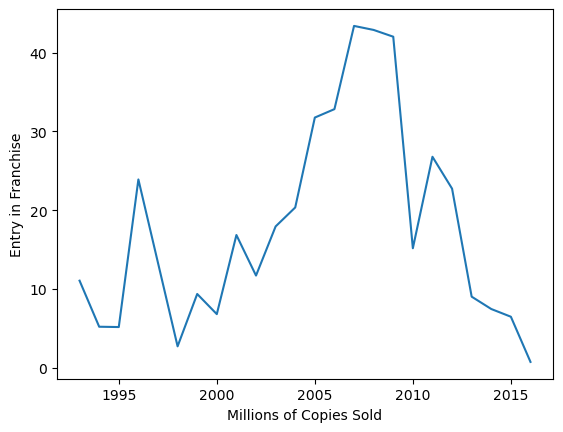

In [43]:
mario_games.groupby('Year')['Global_Sales'].agg('sum').sort_index().plot.line(xlabel='Millions of Copies Sold', ylabel='Entry in Franchise')

We see spikes in 1996, 2007-2009, and 2011. The specific releases responsible are:

    (1996) Super Mario 64 and Mario Kart 64 for the N64
    (2007) Super Mario Galaxy and the Mario Party games for the Wii
    (2008) Mario Kart Wii
    (2009) New Super Mario Bros. Wii
    (2011) Mario Kart 7 and Super Mario 3D Land for the DS 